<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Zyrek/zajecia07052024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


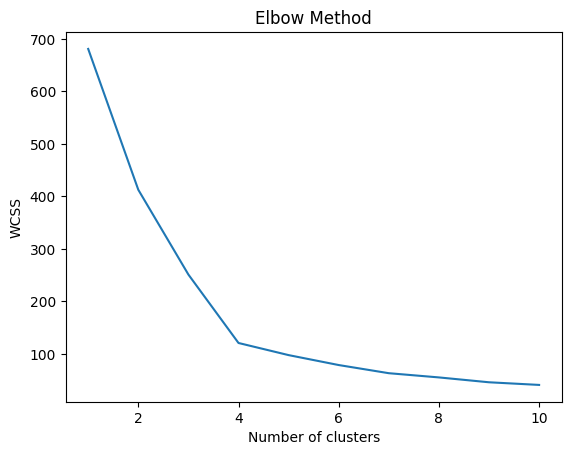

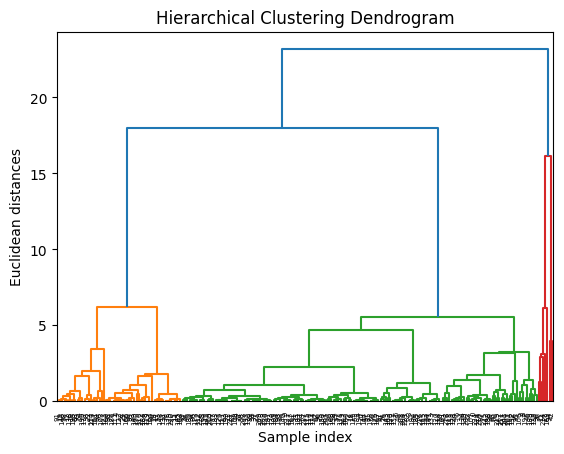

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


df = pd.read_csv('countries of the world (2).csv')

num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[num_cols])

kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

linked = linkage(df_scaled, 'ward')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Euclidean distances')
plt.show()

In [3]:
df['Cluster'] = kmeans.labels_
print(df[['Country', 'Cluster']])

             Country  Cluster
0       Afghanistan         0
1           Albania         0
2           Algeria         8
3    American Samoa         5
4           Andorra         1
..               ...      ...
222       West Bank         0
223  Western Sahara         5
224           Yemen         0
225          Zambia         0
226        Zimbabwe         0

[227 rows x 2 columns]


In [12]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)
labels = kmeans.predict(df_scaled)

df['Cluster'] = labels

for cluster in df['Cluster'].unique():
  print(df[df['Cluster'] == cluster]['Country'])
  print("\n")

0         Afghanistan 
1             Albania 
2             Algeria 
3      American Samoa 
5              Angola 
            ...       
222         West Bank 
223    Western Sahara 
224             Yemen 
225            Zambia 
226          Zimbabwe 
Name: Country, Length: 163, dtype: object


4                   Andorra 
10                    Aruba 
12                  Austria 
14             Bahamas, The 
15                  Bahrain 
17                 Barbados 
19                  Belgium 
22                  Bermuda 
28       British Virgin Is. 
29                   Brunei 
38           Cayman Islands 
52                   Cyprus 
53           Czech Republic 
54                  Denmark 
66            Faroe Islands 
68                  Finland 
69                   France 
71         French Polynesia 
76                  Germany 
78                Gibraltar 
79                   Greece 
80                Greenland 
83                     Guam 
85                 Guernsey 
91     

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
for cluster in df['Cluster'].unique():
    print(f"Klaster {cluster}:")
    print(df[df['Cluster'] == cluster]['Country'].values)
    print("\n")

Klaster 0:
['Afghanistan ' 'Albania ' 'Algeria ' 'American Samoa ' 'Angola '
 'Anguilla ' 'Antigua & Barbuda ' 'Argentina ' 'Armenia ' 'Azerbaijan '
 'Bangladesh ' 'Belarus ' 'Belize ' 'Benin ' 'Bhutan ' 'Bolivia '
 'Bosnia & Herzegovina ' 'Botswana ' 'Bulgaria ' 'Burkina Faso ' 'Burma '
 'Burundi ' 'Cambodia ' 'Cameroon ' 'Cape Verde ' 'Central African Rep. '
 'Chad ' 'Chile ' 'Colombia ' 'Comoros ' 'Congo, Dem. Rep. '
 'Congo, Repub. of the ' 'Cook Islands ' 'Costa Rica ' "Cote d'Ivoire "
 'Croatia ' 'Cuba ' 'Djibouti ' 'Dominica ' 'Dominican Republic '
 'East Timor ' 'Ecuador ' 'Egypt ' 'El Salvador ' 'Equatorial Guinea '
 'Eritrea ' 'Estonia ' 'Ethiopia ' 'Fiji ' 'French Guiana ' 'Gabon '
 'Gambia, The ' 'Gaza Strip ' 'Georgia ' 'Ghana ' 'Grenada ' 'Guadeloupe '
 'Guatemala ' 'Guinea ' 'Guinea-Bissau ' 'Guyana ' 'Haiti ' 'Honduras '
 'Hungary ' 'Indonesia ' 'Iran ' 'Iraq ' 'Jamaica ' 'Jordan '
 'Kazakhstan ' 'Kenya ' 'Kiribati ' 'Korea, North ' 'Kyrgyzstan ' 'Laos '
 'Latvia ' 'Leb